## LSE Career Accelerator
# LSE Data Analysis Using Python

## LSE DA201: Week 4 (optional) challenge activity

In the previous challenge, you answered specific business problems related to the data sets, such as, 'What is the daily average price of gold and oil, and how do they compare?' This will assist investors to decide on the most stable entity to invest in. However, for this week, you will apply your Seaborn and Matplotlib knowledge to understand your data better and solve some specific problems for Investgenics. You will answer the following business questions:

- What is the distribution of the data?
- Which performed better in December 2015, gold or oil?
- Are there any outliers in the opening value of both gold and oil?
- What happened to gold and oil on the stock market during June 2016?

## Prepare your workstation

In [1]:
# Prepare your workstation.
# Import libararies.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import CSV files.
oil = pd.read_csv('../Data/oil_price.csv')
gold = pd.read_csv('../Data/gold_stocks_price.csv')

# View the DataFrames.
print(oil.shape)
print(oil.dtypes)
print(oil.head())

print(gold.shape)
print(gold.dtypes)
print(gold.head())

(1844, 6)
Date      object
Price    float64
Open     float64
High     float64
Low      float64
Vol.      object
dtype: object
         Date   Price    Open    High     Low     Vol.
0  2011-12-01  100.20  100.51  101.17   98.87  275.86K
1  2011-12-02  100.96  100.00  101.56   99.76  245.92K
2  2011-12-05  100.99  101.23  102.44  100.24  239.38K
3  2011-12-06  101.28  100.45  101.42  100.20  217.03K
4  2011-12-07  100.49  101.11  101.94   99.67  330.53K
(1718, 81)
Date              object
Open             float64
High             float64
Low              float64
Close            float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 81, dtype: object
         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2

In [2]:
# Subset gold DataFrame.
gold_plot = gold[['Date', 'Open', 'High', 'Low']]

# View gold_subset.
print(gold_plot.shape)
print(gold_plot.dtypes)
print(gold_plot.head())

(1718, 4)
Date     object
Open    float64
High    float64
Low     float64
dtype: object
         Date        Open        High         Low
0  2011-12-15  154.740005  154.949997  151.710007
1  2011-12-16  154.309998  155.369995  153.899994
2  2011-12-19  155.479996  155.860001  154.360001
3  2011-12-20  156.820007  157.429993  156.580002
4  2011-12-21  156.979996  157.529999  156.130005


In [3]:
# Select only relevant index to work with.
oil_plot = oil[['Date', 'Open', 'High', 'Low']]

# View DataFrames.
print(oil_plot.columns)
print(oil_plot.dtypes)
print(oil_plot.head())

Index(['Date', 'Open', 'High', 'Low'], dtype='object')
Date     object
Open    float64
High    float64
Low     float64
dtype: object
         Date    Open    High     Low
0  2011-12-01  100.51  101.17   98.87
1  2011-12-02  100.00  101.56   99.76
2  2011-12-05  101.23  102.44  100.24
3  2011-12-06  100.45  101.42  100.20
4  2011-12-07  101.11  101.94   99.67


In [4]:
# Import the DateTime module.
import datetime

# Change the Data column to date type. 
gold_plot['Date'] = pd.to_datetime(gold_plot['Date'])
oil_plot['Date'] = pd.to_datetime(oil_plot['Date'])

# Check data types of two DataFrames.
print(gold_plot.dtypes)
print(gold_plot.head())
print(oil_plot.dtypes)
print(oil_plot.head())

Date    datetime64[ns]
Open           float64
High           float64
Low            float64
dtype: object
        Date        Open        High         Low
0 2011-12-15  154.740005  154.949997  151.710007
1 2011-12-16  154.309998  155.369995  153.899994
2 2011-12-19  155.479996  155.860001  154.360001
3 2011-12-20  156.820007  157.429993  156.580002
4 2011-12-21  156.979996  157.529999  156.130005
Date    datetime64[ns]
Open           float64
High           float64
Low            float64
dtype: object
        Date    Open    High     Low
0 2011-12-01  100.51  101.17   98.87
1 2011-12-02  100.00  101.56   99.76
2 2011-12-05  101.23  102.44  100.24
3 2011-12-06  100.45  101.42  100.20
4 2011-12-07  101.11  101.94   99.67


/var/folders/2y/jw_fvb1s0nncctnyn9dc159w0000gn/T/ipykernel_19216/1406549554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_plot['Date'] = pd.to_datetime(gold_plot['Date'])
/var/folders/2y/jw_fvb1s0nncctnyn9dc159w0000gn/T/ipykernel_19216/1406549554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_plot['Date'] = pd.to_datetime(oil_plot['Date'])


# 

# Question 1: What is the distribution of the data?

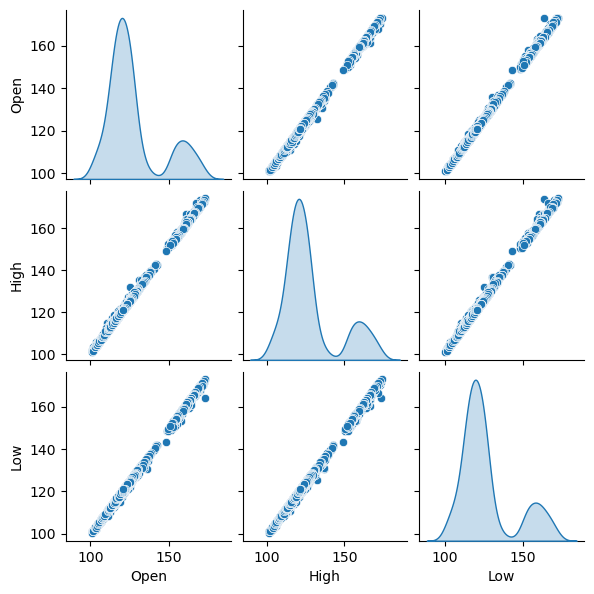

In [5]:
# Plot pairplot for gold subset with KDE.
sns.pairplot(gold_plot, diag_kind='kde', height=2);

In [7]:
# Plot pairplot for oil subset with KDE.
sns.pairplot(oil_plot, diag_kind='kde', height=2);

# 

# Question 2: Which performed better in December 2015, gold or oil?

In [8]:
# Filter the two data sets between the specified dates, and save them as filtered_gold_df and filtered_oil_df. 
filtered_gold = gold_plot[(gold_plot['Date'] >'2015-12-01') & (gold_plot['Date'] < '2015-12-31')]
filtered_oil = oil_plot[(oil_plot['Date'] >'2015-12-01') & (oil_plot['Date'] < '2015-12-31')]

print(filtered_gold.head())
print(filtered_oil.head())

          Date        Open        High         Low
953 2015-12-02  101.349998  101.349998  100.529999
954 2015-12-03  101.230003  101.970001  100.849998
955 2015-12-04  102.739998  104.209999  102.650002
956 2015-12-07  103.320000  103.370003  102.500000
957 2015-12-08  103.129997  103.260002  102.529999
           Date   Open   High    Low
1032 2015-12-02  41.69  41.97  39.84
1033 2015-12-03  40.15  41.78  40.07
1034 2015-12-04  41.31  42.00  39.60
1035 2015-12-07  40.10  40.15  37.50
1036 2015-12-08  37.68  38.58  36.64


In [9]:
# Plots for gold.
# Specify plot size.
plt.figure(figsize=(20, 6))

# Create barplot.
sns.barplot(x='High', y='Date', data=filtered_gold)

<AxesSubplot:xlabel='High', ylabel='Date'>

In [10]:
# Plots for oil.
# Specify plot size.
plt.figure(figsize=(20, 6))

# Create barplot.
sns.barplot(x='High', y='Date', data=filtered_oil)

<AxesSubplot:xlabel='High', ylabel='Date'>

# 

# Question 3: Are there any outliers in the opening value of both gold and oil?

In [11]:
# Plot gold.
# Fig size modification. 
plt.figure(figsize=(8, 6))
plt.title("Opening Value: Gold")

sns.boxplot(x=gold_plot['Open']);

In [12]:
# Plot oil.
# Fig size modification. 
plt.figure(figsize=(8, 6))
plt.title("Opening Value: Oil")

sns.boxplot(x=oil_plot['Open'])

<AxesSubplot:title={'center':'Opening Value: Oil'}, xlabel='Open'>

In [13]:
# Plot gold.
# Fig size modification. 
plt.figure(figsize=(8, 6))
plt.title("Opening Value: Gold")

sns.histplot(x=gold_plot['Open'], bins=20)

<AxesSubplot:title={'center':'Opening Value: Gold'}, xlabel='Open', ylabel='Count'>

In [14]:
# Plot oil.
# Fig size modification. 
plt.figure(figsize=(8, 6))
plt.title("Opening Value: Oil")

sns.histplot(x=oil_plot['Open'], bins=20)

<AxesSubplot:title={'center':'Opening Value: Oil'}, xlabel='Open', ylabel='Count'>

# 

# Question 4: What happened to gold and oil on the stock market during June 2016?

In [15]:
# Plot a lineplot for High and Low for both the oil and gold subsets for the month of June 2016.
plt.figure(figsize = (12, 6))

filtered_gold = gold_plot[(gold_plot['Date'] >'2016-06-01') & (gold_plot['Date'] < '2016-06-30')]

sns.lineplot(data=filtered_gold, x='High', y='Date');

In [16]:
plt.figure(figsize = (12,6))
filtered_oil = oil_plot[(oil_plot['Date'] >'2016-06-01') & (oil_plot['Date'] < '2016-06-30')]

sns.lineplot(data=filtered_oil, x='High', y='Date')

<AxesSubplot:xlabel='High', ylabel='Date'>

In [17]:
# Customise plots.
filtered_gold = gold_plot[(gold_plot['Date'] >'2016-06-01') & (gold_plot['Date'] < '2016-06-30')]

g = sns.relplot(data=filtered_gold, x='High', y='Date')

g.set_axis_labels("High", "Date")
g.fig.suptitle("High Value: Gold (June 2016)", y=1.02, fontsize=16);

In [18]:
filtered_oil = oil_plot[(oil_plot['Date'] >'2016-06-01') & (oil_plot['Date'] < '2016-06-30')]

g = sns.relplot(data=filtered_oil, x='High', y='Date')

g.set_axis_labels("High", "Date")
g.fig.suptitle("High Value: Oil (June 2016)", y=1.02, fontsize=16);